# Handwritten Digit Recognition using Support Vector Machine (SVM)

This script loads the sklearn digits dataset, trains multiple SVM models with different kernels,
and evaluates their accuracy in classifying handwritten digits (0-9). It also visualizes sample
digits and predicted results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Load Dataset
dataset = load_digits()

In [3]:
# Summarize Dataset
print("Data:\n", dataset.data)
print("Target:\n", dataset.target)

print("Data shape:", dataset.data.shape)
print("Images shape:", dataset.images.shape)

dataimageLength = len(dataset.images)
print("Number of images:", dataimageLength)

Data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Target:
 [0 1 2 ... 8 9 8]
Data shape: (1797, 64)
Images shape: (1797, 8, 8)
Number of images: 1797


<Figure size 640x480 with 0 Axes>

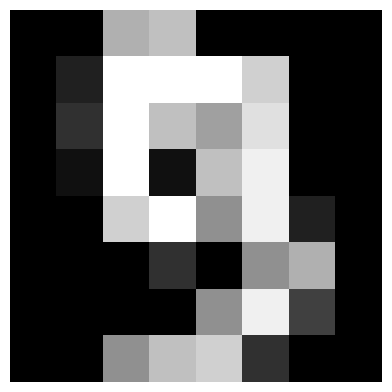

In [4]:
# Visualize the Dataset
n = 9  # Sample index
plt.gray()
plt.matshow(dataset.images[n])
plt.axis('off')
plt.show()

In [5]:
# Segregate Dataset into X (Input/Independent Variable) & Y (Output/Dependent Variable)
X = dataset.images.reshape((dataimageLength, -1))  # flatten images into vectors
Y = dataset.target

In [6]:
# Splitting Dataset into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [7]:
# Training
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

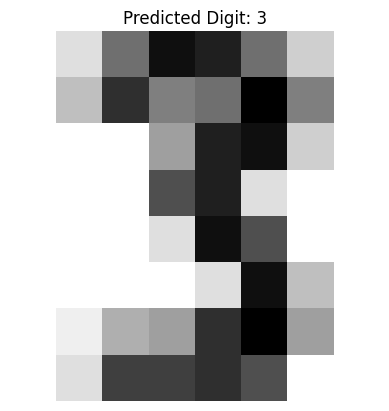

Prediction for image index 13 : 3 



In [8]:
# Predicting what the digit is from Test Data (single example)
n = 13
result = model.predict(dataset.images[n].reshape(1, -1))
plt.imshow(dataset.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.title(f'Predicted Digit: {result[0]}')
plt.show()
print("Prediction for image index", n, ":", result[0], "\n")

In [9]:
# Prediction for all Test Data
y_pred = model.predict(X_test)
print("Predicted vs Actual:\n", np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

Predicted vs Actual:
 [[2 2]
 [8 8]
 [2 2]
 [6 6]
 [6 6]
 [7 7]
 [1 1]
 [9 9]
 [8 8]
 [5 5]
 [2 2]
 [8 8]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [1 1]
 [0 0]
 [5 5]
 [8 8]
 [8 8]
 [7 7]
 [8 8]
 [4 4]
 [7 7]
 [5 5]
 [4 4]
 [9 9]
 [2 2]
 [9 9]
 [4 4]
 [7 7]
 [6 6]
 [8 8]
 [9 9]
 [4 4]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [8 8]
 [6 6]
 [7 7]
 [7 7]
 [1 1]
 [0 0]
 [7 7]
 [6 6]
 [2 2]
 [1 1]
 [9 9]
 [6 6]
 [7 7]
 [9 9]
 [0 0]
 [0 0]
 [5 5]
 [1 1]
 [6 6]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [4 4]
 [1 1]
 [9 9]
 [2 2]
 [6 6]
 [9 9]
 [1 1]
 [8 8]
 [3 3]
 [5 5]
 [1 1]
 [2 2]
 [8 8]
 [2 2]
 [2 2]
 [9 9]
 [7 7]
 [2 2]
 [3 3]
 [6 6]
 [0 0]
 [5 5]
 [3 3]
 [7 7]
 [5 5]
 [1 1]
 [2 2]
 [9 9]
 [9 9]
 [3 3]
 [1 1]
 [7 7]
 [7 7]
 [4 4]
 [8 8]
 [5 5]
 [8 8]
 [5 5]
 [5 5]
 [2 2]
 [5 5]
 [9 9]
 [0 0]
 [7 7]
 [1 1]
 [4 4]
 [4 7]
 [3 3]
 [4 4]
 [8 8]
 [9 9]
 [7 7]
 [9 9]
 [8 8]
 [2 2]
 [1 6]
 [5 5]
 [2 2]
 [5 5]
 [8 8]
 [4 4]
 [1 8]
 [7 7]
 [0 0]
 [6 6]
 [1 1]
 [5 5]
 [5 9]
 [9 9]
 [9 9]
 [5 5]
 [9 9]
 [9 9]
 [5 5]
 [7 7]
 [5 5]
 [6 6

In [10]:
# Evaluate Model - Accuracy Score
print("Accuracy of the Model: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy of the Model: 97.11%


In [11]:
# Play with Different Models (Kernels and Params)
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)  # default kernel='rbf'
model4 = svm.SVC(gamma=0.001, C=0.1)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

y_predModel1 = model1.predict(X_test)
y_predModel2 = model2.predict(X_test)
y_predModel3 = model3.predict(X_test)
y_predModel4 = model4.predict(X_test)

In [12]:
print("Accuracy of Model 1 (linear kernel): {:.2f}%".format(accuracy_score(y_test, y_predModel1) * 100))
print("Accuracy of Model 2 (rbf kernel): {:.2f}%".format(accuracy_score(y_test, y_predModel2) * 100))
print("Accuracy of Model 3 (rbf gamma=0.001): {:.2f}%".format(accuracy_score(y_test, y_predModel3) * 100))
print("Accuracy of Model 4 (rbf gamma=0.001, C=0.1): {:.2f}%".format(accuracy_score(y_test, y_predModel4) * 100))

Accuracy of Model 1 (linear kernel): 97.11%
Accuracy of Model 2 (rbf kernel): 99.11%
Accuracy of Model 3 (rbf gamma=0.001): 99.56%
Accuracy of Model 4 (rbf gamma=0.001, C=0.1): 96.67%
